# Load libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

## set up sorting algos array

In [2]:
sort_algos = ["SelectionSort", "InsertionSort", "MergeSort", "CountingSort", "NativeSort", "HeapSort", "QuickSort"]

# Load data

In [3]:
data={}
for x in sort_algos:
        data[x]=pd.read_csv("./data/no_warmup/" + x + ".csv")

### Run this cell to visualize all the raw data

In [4]:
for algo, df in data.items():
    print(algo)
    print(df.head(2),"\n")

SelectionSort
   power     start_time      stop_time
0      1  1569948367672  1569948367682
1      2  1569948367685  1569948367686 

InsertionSort
   power     start_time      stop_time
0      1  1569948848980  1569948848983
1      2  1569948848983  1569948848984 

MergeSort
   power     start_time      stop_time
0      1  1569948955756  1569948955760
1      2  1569948955760  1569948955761 

CountingSort
   power     start_time      stop_time
0      1  1569948959669  1569948959683
1      2  1569948959683  1569948959687 

NativeSort
   power     start_time      stop_time
0      1  1569948961488  1569948961493
1      2  1569948961493  1569948961494 

HeapSort
   power     start_time      stop_time
0      1  1569948970633  1569948970637
1      2  1569948970637  1569948970638 

QuickSort
   power     start_time      stop_time
0      1  1569948951429  1569948951431
1      2  1569948951432  1569948951432 



### Run the next 2 cells to see first dataframe and quick metrics about it

In [5]:
data[sort_algos[3]].head(2)

,power,start_time,stop_time
0,1,1569948959669,1569948959683
1,2,1569948959683,1569948959687


In [6]:
data[sort_algos[3]].describe()

,power,start_time,stop_time
count,15.000000,1.500000e+01,1.500000e+01
mean,8.000000,1.569949e+12,1.569949e+12
std,4.472136,3.461356e+02,4.905111e+02
min,1.000000,1.569949e+12,1.569949e+12
25%,4.500000,1.569949e+12,1.569949e+12
50%,8.000000,1.569949e+12,1.569949e+12
75%,11.500000,1.569949e+12,1.569949e+12
max,15.000000,1.569949e+12,1.569949e+12


# Creating the new features

- running time in miliseconds<br>
- log_run_time

In [7]:
'''
This function computes the log base 2 of the parameter passed to the function
If the parameter is equal to zero then we assume it's equal to 1 because it isn't that big of a difference in milliseconds
'''
def log_time(run_time):
    if run_time ==0:
        run_time=1
    return math.log(run_time,2)
    

In [8]:
# Array count is a the number of arrays used in the benchmark, we didn't export it as a csv
array_count = 1000

for algo, df in data.items():
    # Compute runtime
    df["run_time"] = (df.loc[:,"stop_time"] - df.loc[:,"start_time"])/array_count
    
    # log of runtime
    df["log_run_time"] = df.loc[:,'run_time'].apply(lambda x: log_time(x))

## Selection sort Dataframe

In [9]:
data[sort_algos[0]]

,power,start_time,stop_time,run_time,log_run_time
0,1,1569948367672,1569948367682,0.010,-6.643856
1,2,1569948367685,1569948367686,0.001,-9.965784
2,3,1569948367687,1569948367689,0.002,-8.965784
3,4,1569948367689,1569948367693,0.004,-7.965784
4,5,1569948367693,1569948367697,0.004,-7.965784
5,6,1569948367699,1569948367706,0.007,-7.158429
6,7,1569948367708,1569948367721,0.013,-6.265345
7,8,1569948367728,1569948367761,0.033,-4.921390
8,9,1569948367766,1569948367874,0.108,-3.210897
9,10,1569948367884,1569948368295,0.411,-1.282790


# Plotting runtime for each sort

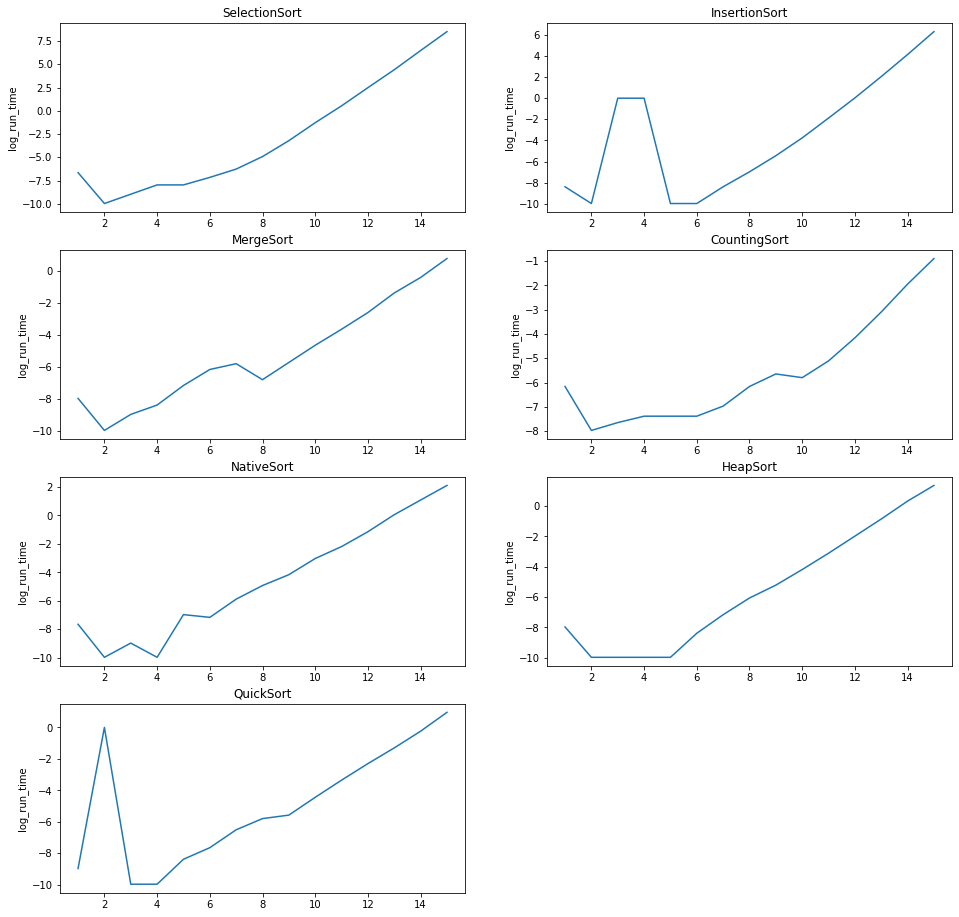

In [10]:
# INDIVIDUAL PLOT
fig = plt.figure(figsize=(16, 16))
fig.tight_layout()

nb_sorts = len(sort_algos)
columns = 2
rows = math.ceil(nb_sorts/2) # We round up, if we have 7 sorts, with 2 columns, we need 4 rows. so rounding up 6/2 gives 4
i=1
for algo, df in data.items():
    # Simply plotting without the log add param `logx = True` or `logy = True` for log on x or y axis to the plot function
    # Check pandas dataframe.plot() for more details
    plt.subplot(rows, columns, i)
    plt.title(algo)
    #plt.xlabel('power')
    plt.ylabel('log_run_time')
    
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"])
    i += 1 # Next subplot
plt.show()

## Grouped plot

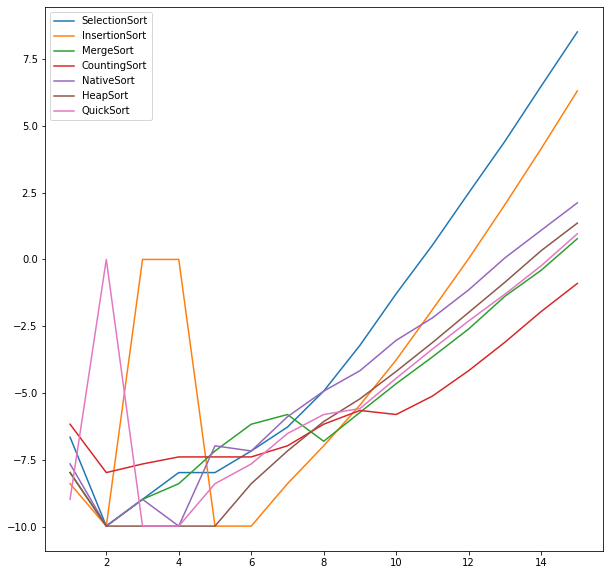

In [11]:
fig = plt.figure(figsize=(10, 10))

for algo, df in data.items():
    #df = df.iloc[6:]
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    

plt.legend()
plt.show()

# Computing the coeff

SelectionSort
a: 1.2630637009882038, b: -12.90044106378063 

InsertionSort
a: 0.8475523675316307, b: -10.260105538643119 

MergeSort
a: 0.6901956178542783, b: -10.774990050261284 

CountingSort
a: 0.4281195521642462, b: -9.003762985980305 

NativeSort
a: 0.8549013190409525, b: -11.420082573647775 

HeapSort
a: 0.8407511791406037, b: -12.265007655533882 

QuickSort
a: 0.5873389397802323, b: -9.59682479244546 



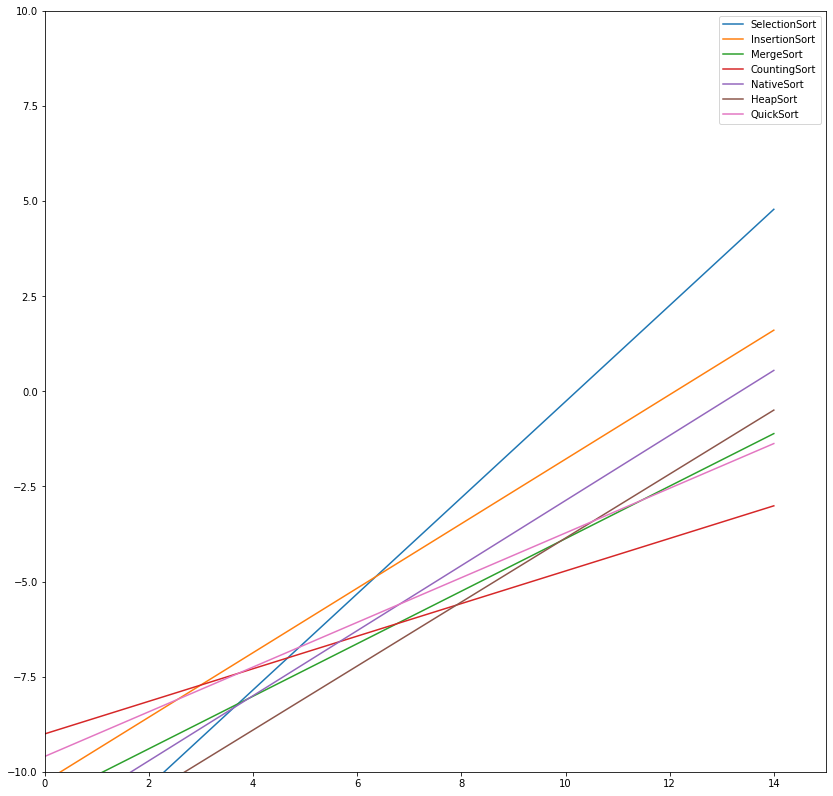

In [12]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])

for algo, df in data.items():
    print(algo)
    
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]

    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')
    
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo)
    
plt.legend()
plt.show()

SelectionSort
a: 1.8711752423406636, b: -19.835544237647017 

InsertionSort
a: 1.8462776050626468, b: -21.855400804347326 

MergeSort
a: 0.9362375278550545, b: -13.654873167324455 

CountingSort
a: 0.7272962729805982, b: -12.419321596245576 

NativeSort
a: 1.005122884004025, b: -13.061647016130363 

HeapSort
a: 1.0688294976931387, b: -14.743261155611686 

QuickSort
a: 0.9536863618092614, b: -13.662735344940996 



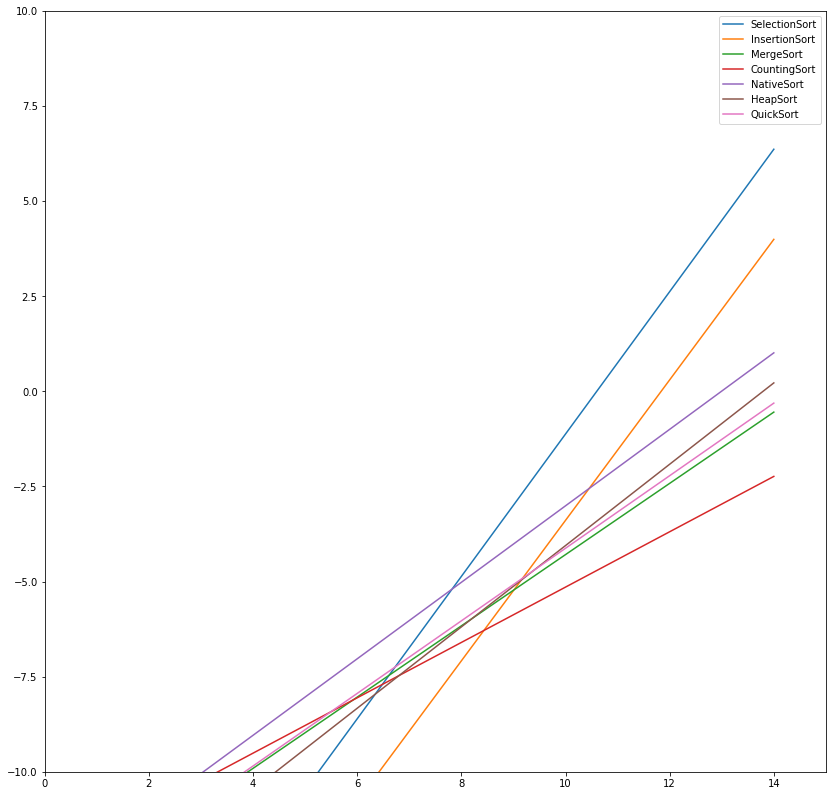

In [13]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])

for algo, df in data.items():
    df = df.iloc[6:]
    print(algo)
    
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]

    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')
    
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo)
    
plt.legend()
plt.show()

# Ploting benchmark results and regression

## All data in the dataframes

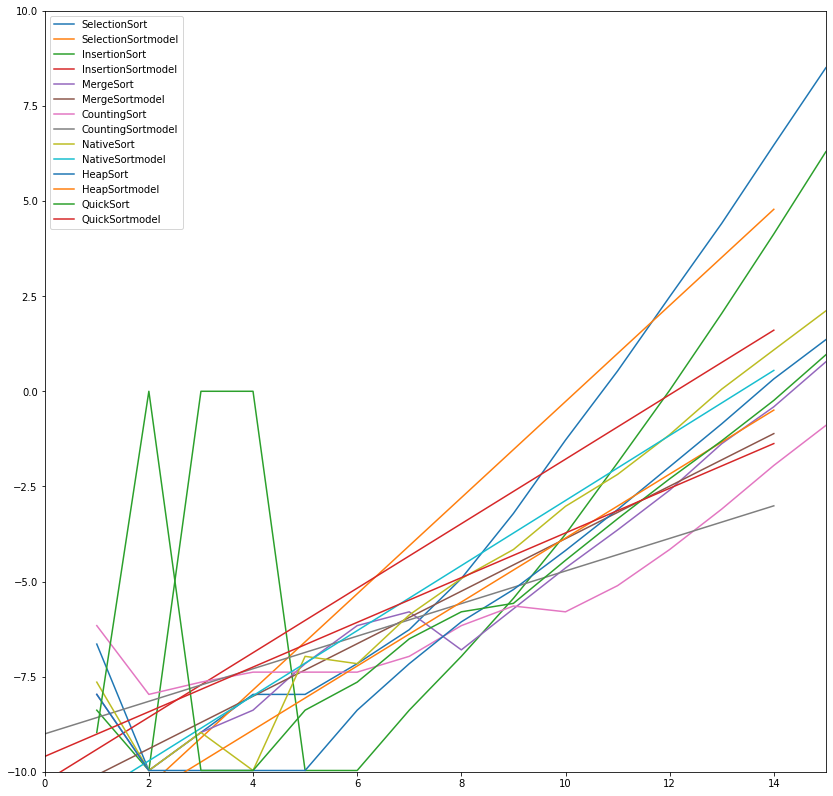

In [14]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])
for algo, df in data.items():
    #df = df.iloc[6:]
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')

plt.legend()
plt.show()

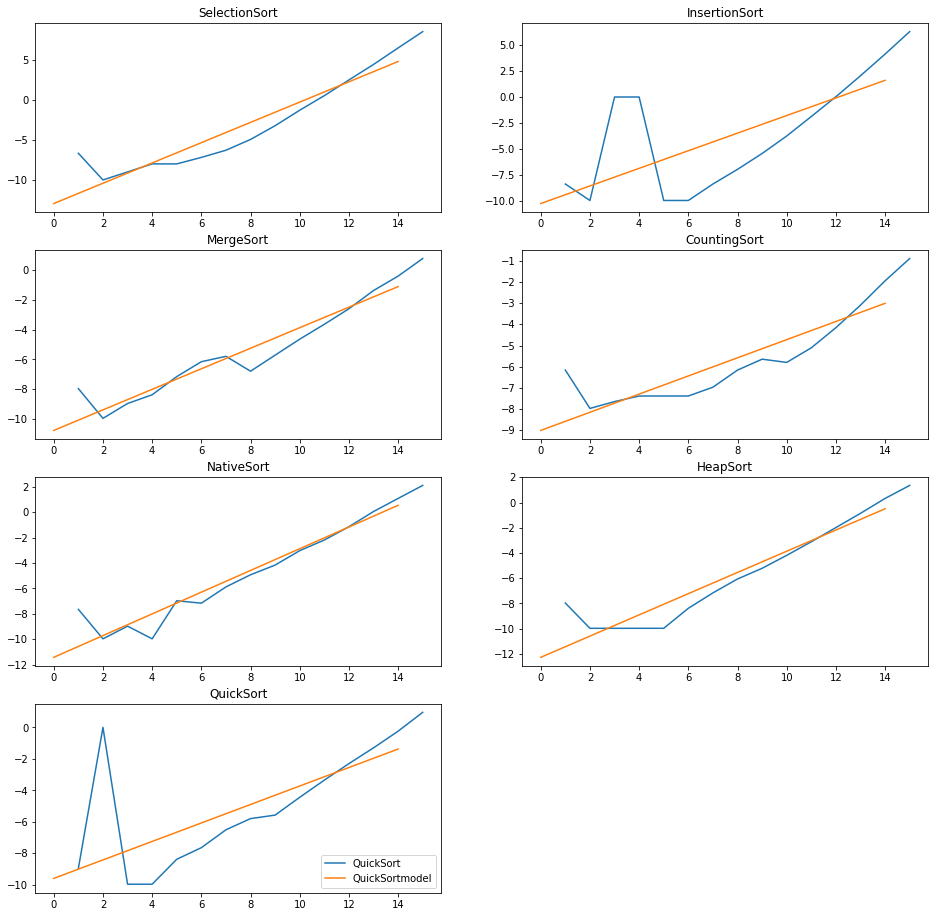

In [15]:
fig = plt.figure(figsize=(16, 16))
fig.tight_layout() # Tight labels to the charts

axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])

#multiple subplot parameters
nb_sorts = len(sort_algos)
columns = 2
rows = math.ceil(nb_sorts/2) # We round up, if we have 7 sorts, with 2 columns, we need 4 rows. so rounding up 6/2 gives 4
i=1


for algo, df in data.items():
    #new subplot
    plt.subplot(rows, columns, i)
    plt.title(algo)
    
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')
    
    # next subplot
    i += 1
plt.legend()
plt.show()

## Omitting the first 6 results

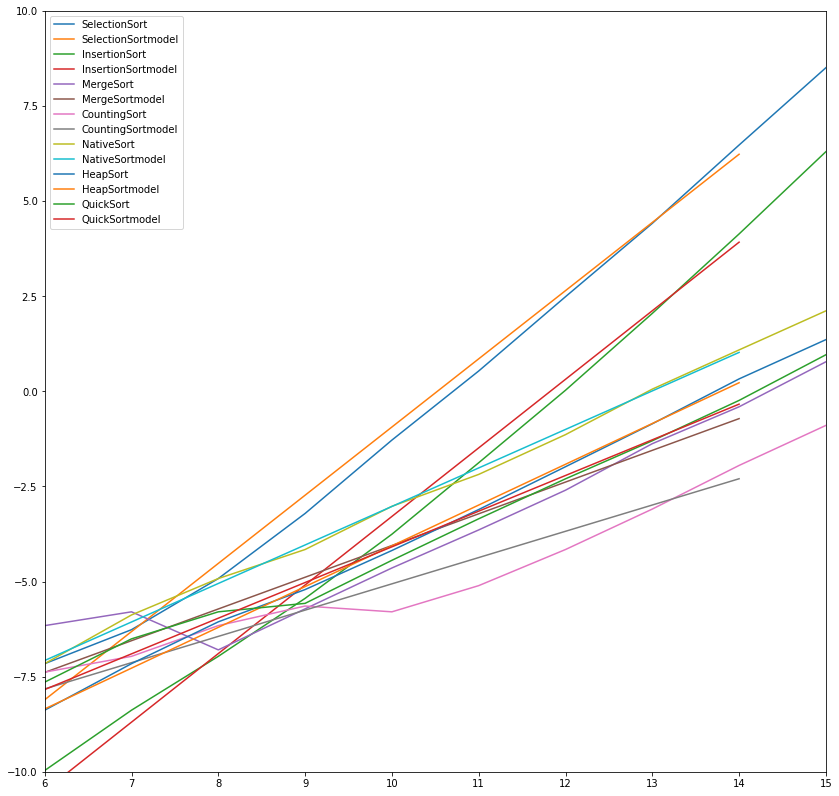

In [16]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([6,15])
axes.set_ylim([-10,10])
for algo, df in data.items():
    df = df.iloc[5:]
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')

plt.legend()
plt.show()

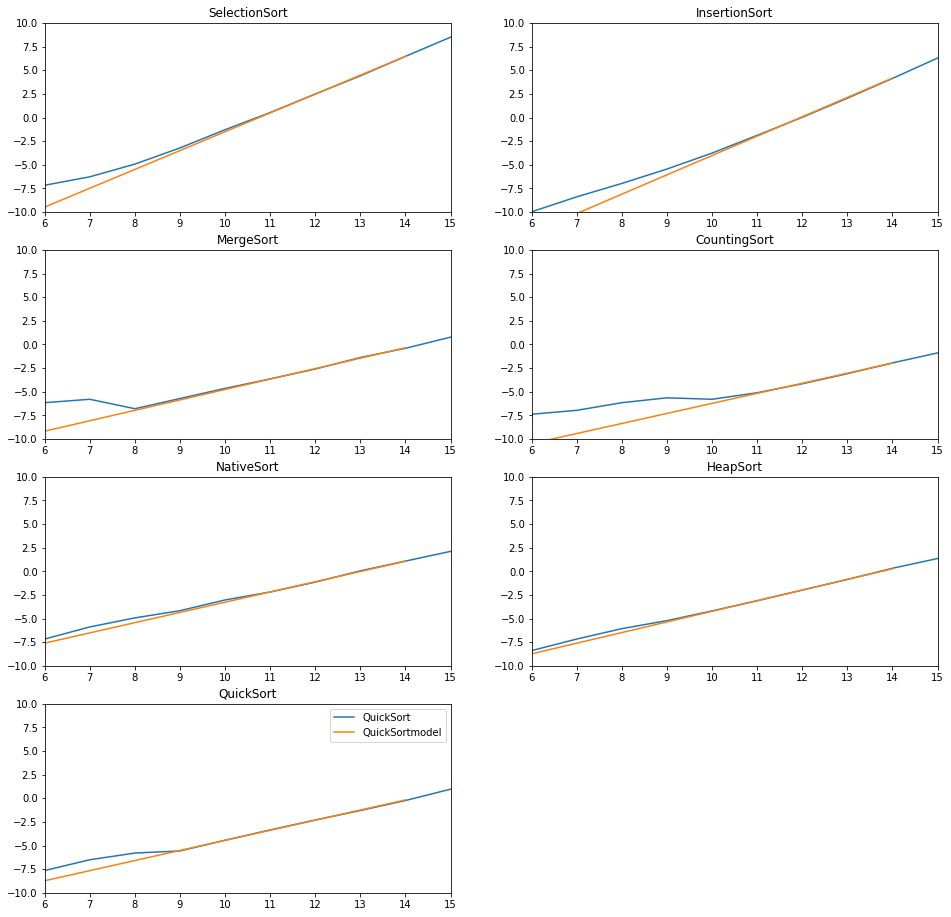

In [17]:
fig = plt.figure(figsize=(16, 16))
fig.tight_layout() # Tight labels to the charts

#multiple subplot parameters
nb_sorts = len(sort_algos)
columns = 2
rows = math.ceil(nb_sorts/2) # We round up, if we have 7 sorts, with 2 columns, we need 4 rows. so rounding up 6/2 gives 4
i=1


for algo, df in data.items():
    df = df.iloc[5:]
    
    #new subplot
    plt.subplot(rows, columns, i)
    plt.title(algo)
    axes = plt.gca()
    axes.set_xlim([6,15])
    axes.set_ylim([-10,10])

    
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Omitting the first 5 results
    df = df.iloc[5:]
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')
    
    # next subplot
    i += 1
plt.legend()
plt.show()